In [1]:
print('Bertrand\'s paradox')

Bertrand's paradox


Bertrand, method1 probability: 0.323


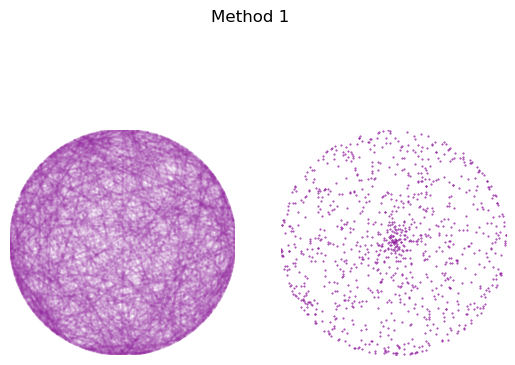

Bertrand, method2 probability: 0.469


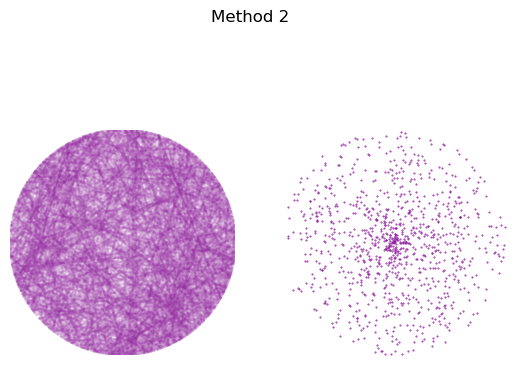

Bertrand, method3 probability: 0.277


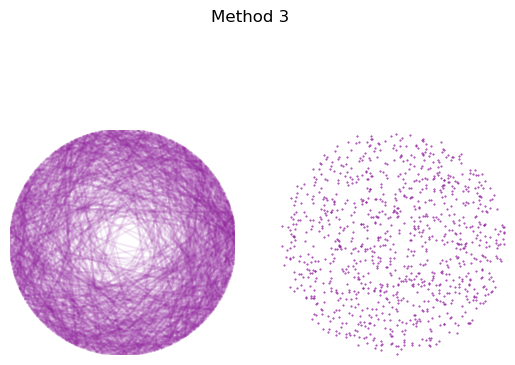

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Circle
from matplotlib.lines import Line2D

#tau = 2*pi
TAU = 2*np.pi

#color to use for plotting
PURPLE = (0.57,0.13,0.62)


#number of chords to plot
Nr_chords_to_plot = 1000

#statistics with sample size of nr_chords
nr_chords = 1000

#circle radius
r = 1

#length of side of the equilateral triangle (ala din cerc)
#since the radius is 1 => the length of the side is sqrt of 3
side_length = r * np.sqrt(3)


#setting up the axes:
def setup_axes():
    fig, axes = plt.subplots(nrows=1, ncols=2, subplot_kw={'aspect': 'equal'})
    for ax in axes:
        #create a circle centered at (0,0) with radius 1
        circle = Circle((0,0), r, facecolor='none')
        ax.add_artist(circle)
        ax.set_xlim((-r,r))
        ax.set_ylim(-r,r)
        ax.axis('off')
    return fig, axes



#there are 3 different methods for the solution of the paradox
"""Method 1:
    using random endpoints ~ you pick two random points on the circle and join 
    them with a straight line. You then calculate the probability that the chord formed
    in this manner is longer than the side of the triangle (should be 1/3)
    !uniformly distributed!
"""
def bertrand_method1():
    angles = np.random.random((nr_chords,2))*TAU
    chords = np.array((r*np.cos(angles),r*np.sin(angles)))
    chords = np.swapaxes(chords,0,1)
    
    #midpoints of chords
    midpoints = np.mean(chords,axis=2).T
    return chords, midpoints


"""for methods 2 and 3 we need a function that returns the chords
from the midpoints that where provided (as a parameter)"""

def get_chords_from_midpoints(midpoints):
    chords = np.zeros((nr_chords,2,2))
    for i, (x0,y0) in enumerate(midpoints.T):
        m = -x0/y0
        c = y0 + x0**2/y0
        A,B,C = m**2+1, 2*m*c, c**2-r**2
        d = np.sqrt(B**2 -4*A*C)
        x = np.array(((-B+d),(-B-d)))/2/A
        y = m*x+c
        chords[i] = (x,y)
    return chords

"""
Method 2: 
    using random radius ~ you pick a random radius and a random point on it.
    after you construct a unique chord perpendicular to the point.
    (should be 1/2)
    !uniformly distributed!
"""
def bertrand_method2():
    angles = np.random.random(nr_chords)*TAU
    radii = np.random.random(nr_chords)*r
    midpoints = np.array((radii * np.cos(angles), radii * np.sin(angles)))
    chords = get_chords_from_midpoints(midpoints)
    return chords, midpoints

"""
Method 3: 
    using random midpoint ~ you pick a random point inside the circle and take it
    to be the midpoint of the chord perpendicular to the radius containing it. 
    (should be about 1/4)
    !uniformly distributed!
"""
def bertrand_method3():
    angles = np.random.random(nr_chords)*TAU
    radii = np.sqrt(np.random.random(nr_chords))*r
    midpoints = np.array((radii * np.cos(angles), radii * np.sin(angles)))
    chords = get_chords_from_midpoints(midpoints)
    return chords, midpoints



bertrand_methods = {1: bertrand_method1, 2: bertrand_method2, 3: bertrand_method3}

"""
function that plots the solution with the method chosen
"""

def plot_bertrand_method(method_number):
    chords, midpoints = bertrand_methods[method_number]()
    
    success = [False]*nr_chords
    
    fig, axes = setup_axes()
    
    for i, chord in enumerate(chords):
        x,y = chord
        if np.hypot(x[0]-x[1], y[0]-y[1])> side_length:
            success[i] = True
        if i < Nr_chords_to_plot:
            line = Line2D(*chord,color=PURPLE, alpha=0.1)
            axes[0].add_line(line)
    axes[1].scatter(*midpoints, s=0.2, color=PURPLE)
    fig.suptitle('Method {}'.format(method_number))
    probability = np.sum(success)/nr_chords
    
    print('Bertrand, method{} probability: {}'.format(method_number, probability))
    plt.savefig('bertrand{}.png'.format(method_number))
    plt.show()

plot_bertrand_method(1)
plot_bertrand_method(2)
plot_bertrand_method(3)


